In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)

data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Train accuracy - 1.0
Test accuracy - 0.8


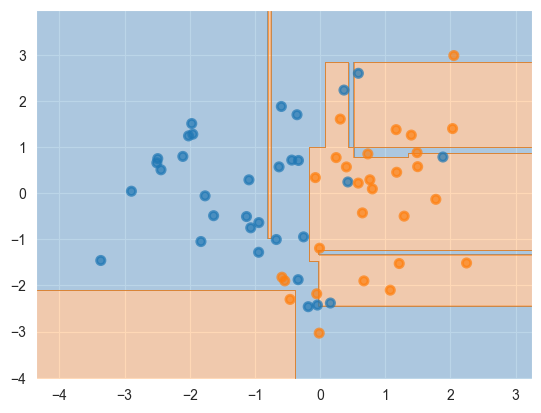

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

dt_cls = DecisionTreeClassifier()

dt_cls.fit(X_train, y_train)

plot_surface(dt_cls, X_test, y_test)

print('Train accuracy -', accuracy_score(y_train, dt_cls.predict(X_train)))
print('Test accuracy -', accuracy_score(y_test, dt_cls.predict(X_test)))

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [42]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
               edgecolors=np.array(palette)[y], linewidths=2)

    ax.plot([], [], label='train_acc : %0.5f' % train_acc)
    ax.plot([], [], label='test_acc : %0.5f' % test_acc)

    plt.legend(loc='lower right', prop={'size': 20})

In [38]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

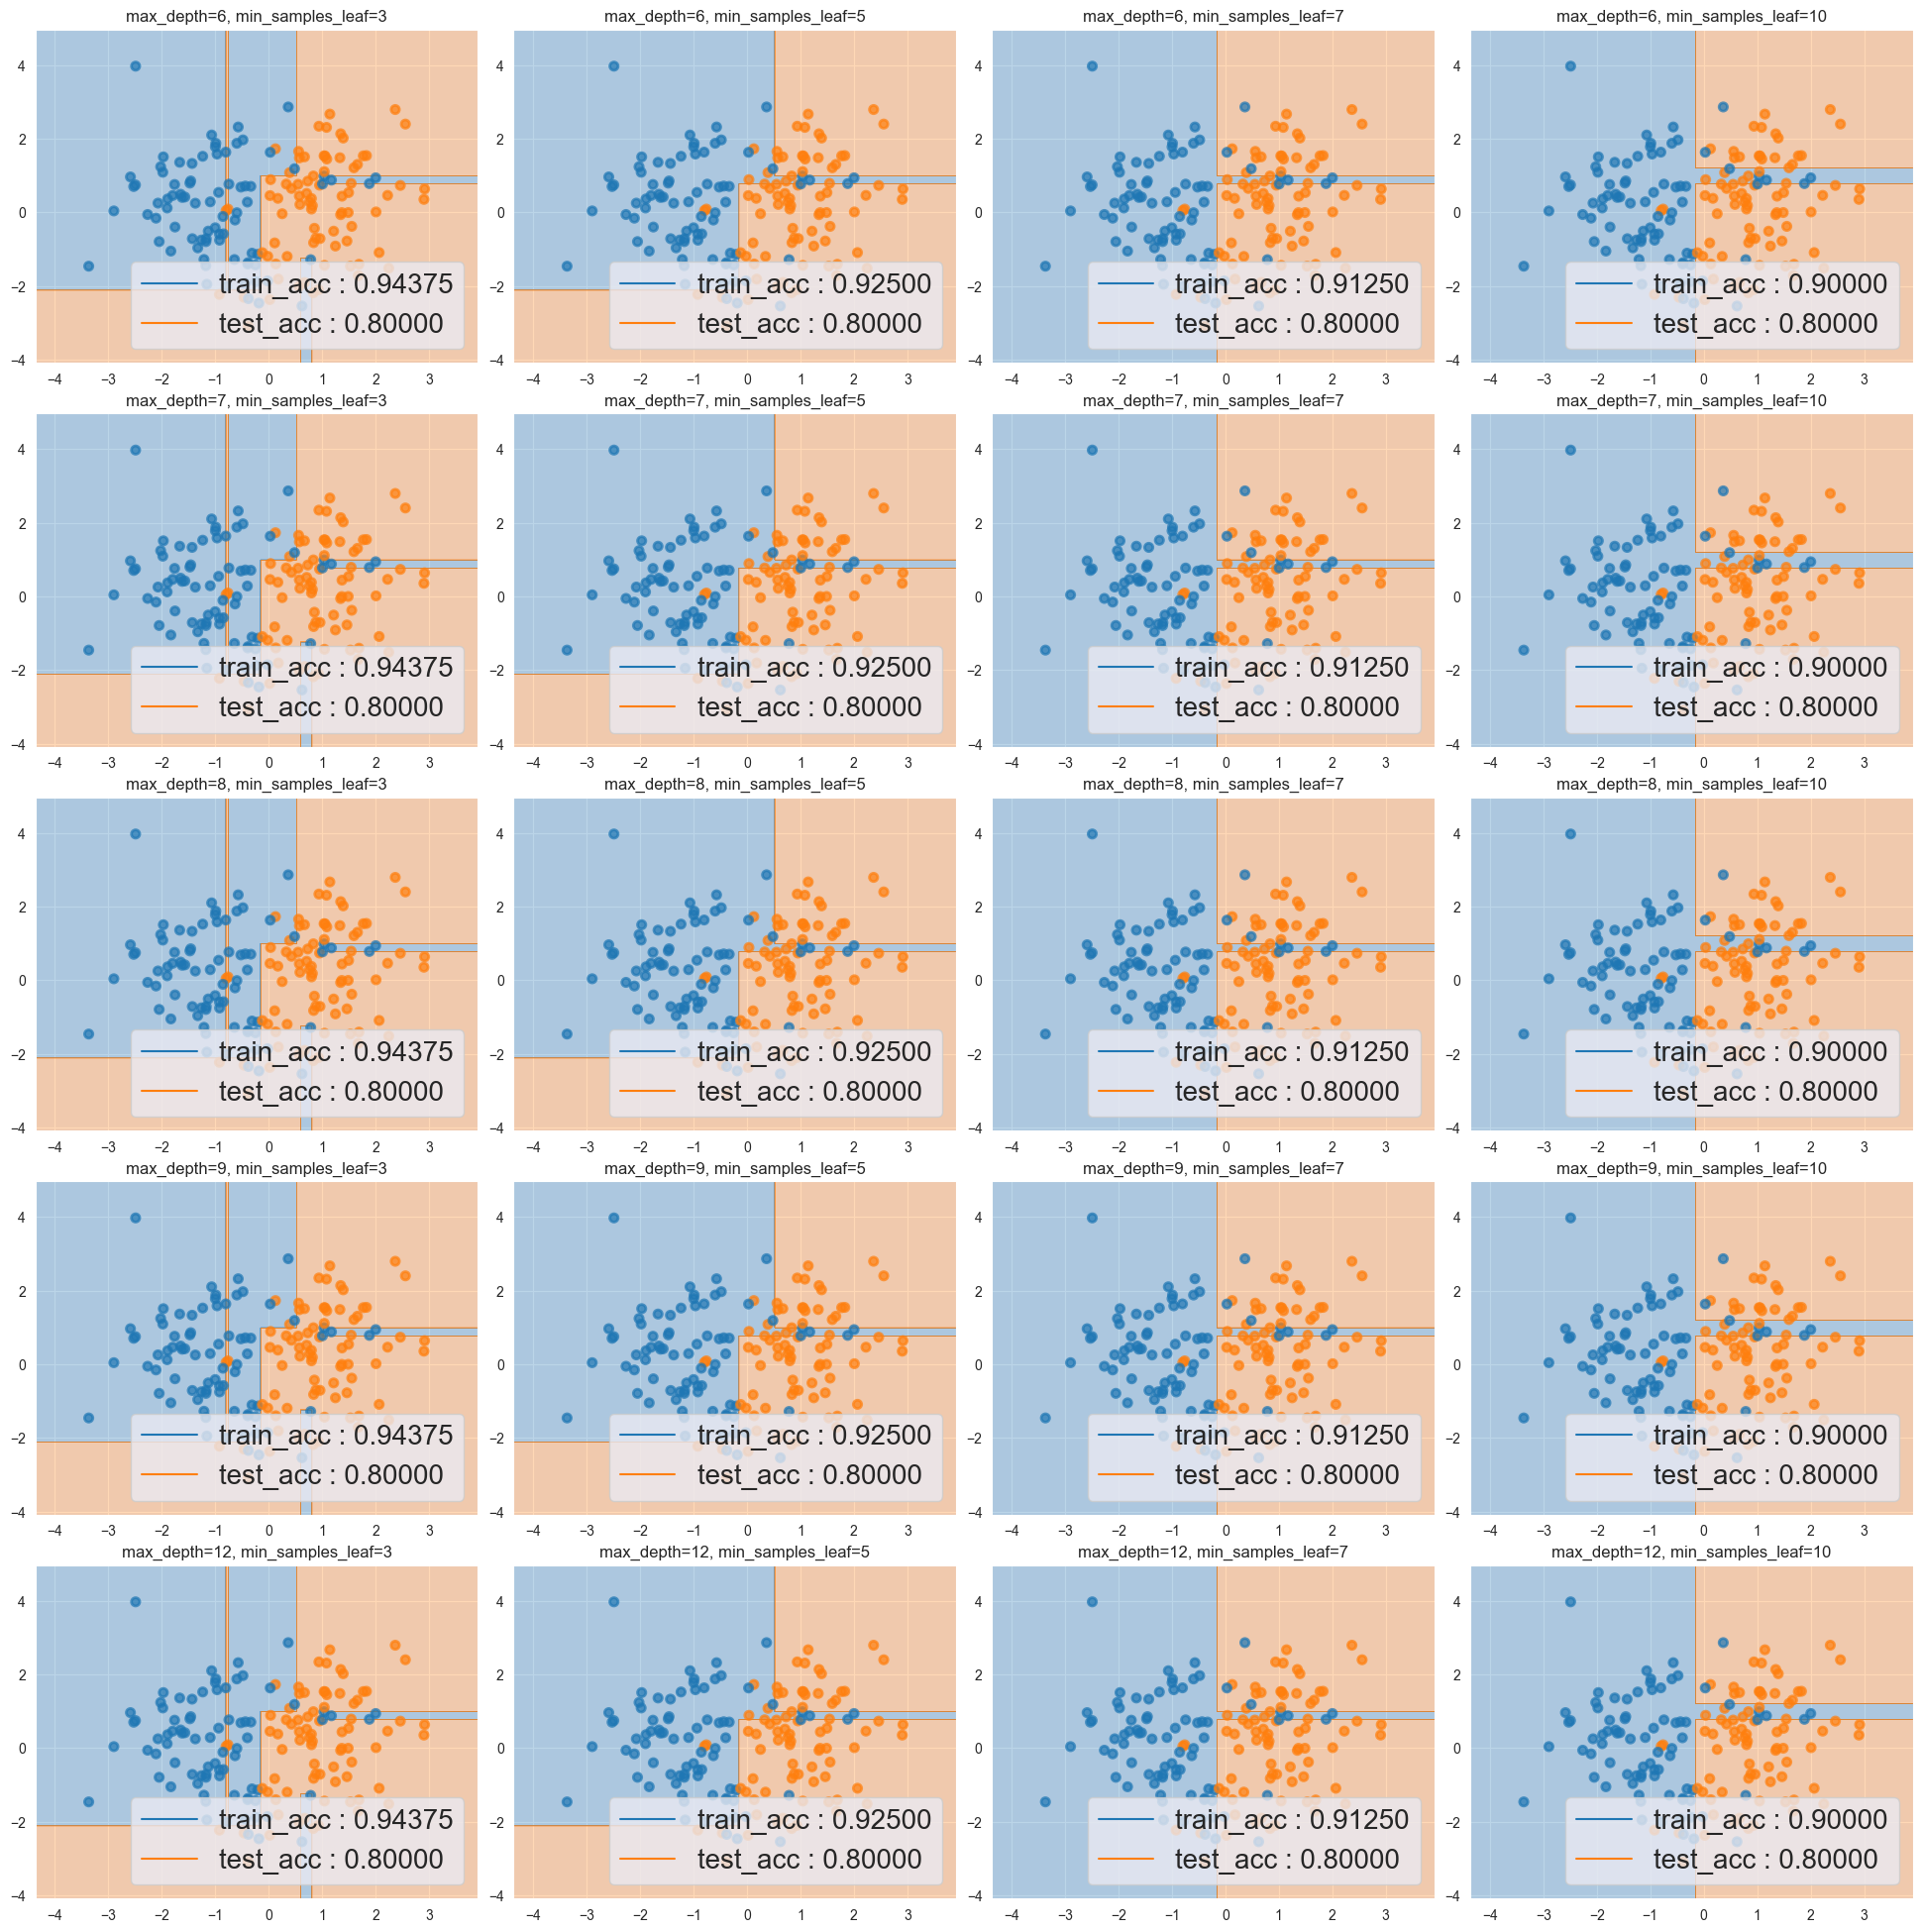

In [54]:
### Your code is here

fig = plt.figure(figsize=(20, 20))

# fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 20))
# ax[1,0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)

cnt = 1
for max_depth in max_depth_set:
    for min_samples_leaf in min_samples_leaf_set:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)

        ax = fig.add_subplot(len(max_depth_set), len(min_samples_leaf_set), cnt)
        ax.set_title(f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}')

        plot_surface_axes(clf=model, X=X_train, y=y_train, ax=ax,
                          train_acc=accuracy_score(y_true=y_train, y_pred=model.predict(X_train)),
                          test_acc=accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))
        cnt += 1

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin


class CustomFunctionTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        return X_

In [108]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [111]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('transformer', CustomFunctionTransformer("x1", "x2", lambda x, y: 2 * x - y)),
                       ('clf', DecisionTreeClassifier(max_depth=3))])

pipe.fit(X_train, y_train)

print('Train accuracy -', accuracy_score(y_train, pipe.predict(X_train)).__round__(2))
print('Test accuracy -', accuracy_score(y_test, pipe.predict(X_test)).__round__(2))

Train accuracy - 0.86
Test accuracy - 0.75


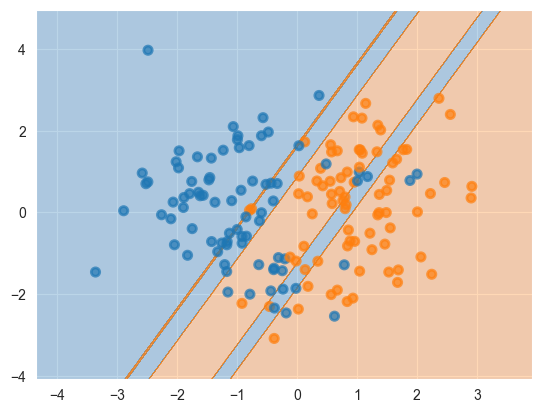

In [106]:
def pipe_plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    a = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1', 'x2'])
    Z = clf.predict(a)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)


pipe_plot_surface(pipe, X_train, y_train)